# To Predict Restaurant Food Cost

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading train and test dataset
train=pd.read_excel('C:/Users/Hp/Desktop/Participants_Data_Final/Data_Train.xlsx')
test=pd.read_excel('C:/Users/Hp/Desktop/Participants_Data_Final/Data_Test.xlsx')

In [3]:
#checking the shape of a dataset
train.shape, test.shape

((12690, 9), (4231, 8))

In [4]:
#checking data type
train.dtypes, test.dtypes

(TITLE            object
 RESTAURANT_ID     int64
 CUISINES         object
 TIME             object
 CITY             object
 LOCALITY         object
 RATING           object
 VOTES            object
 COST              int64
 dtype: object,
 TITLE            object
 RESTAURANT_ID     int64
 CUISINES         object
 TIME             object
 CITY             object
 LOCALITY         object
 RATING           object
 VOTES            object
 dtype: object)

all are object data type except ID

In [5]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [6]:
#checking columns
train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [7]:
#renaming columns for easy handling
train.rename(columns={'TITLE':'title', 'RESTAURANT_ID':'restaurant_id', 'CUISINES':'cuisines', 'TIME':'time', 'CITY':'city', 'LOCALITY':'locality',
       'RATING':'rating', 'VOTES':'votes', 'COST':'cost'},inplace=True)
test.rename(columns={'TITLE':'title', 'RESTAURANT_ID':'restaurant_id', 'CUISINES':'cuisines', 'TIME':'time', 'CITY':'city', 'LOCALITY':'locality',
       'RATING':'rating', 'VOTES':'votes'},inplace=True)

In [8]:
test.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [9]:
#checking null values in train dataset
train.isnull().sum()

title               0
restaurant_id       0
cuisines            0
time                0
city              112
locality           98
rating              2
votes            1204
cost                0
dtype: int64

having null values in city,locality,rating and votes


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          12690 non-null  object
 1   restaurant_id  12690 non-null  int64 
 2   cuisines       12690 non-null  object
 3   time           12690 non-null  object
 4   city           12578 non-null  object
 5   locality       12592 non-null  object
 6   rating         12688 non-null  object
 7   votes          11486 non-null  object
 8   cost           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [11]:
#checking null values in test dataset
test.isnull().sum()

title              0
restaurant_id      0
cuisines           0
time               0
city              35
locality          30
rating             2
votes            402
dtype: int64

there are missing values in city locality rating and votes

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          4231 non-null   object
 1   restaurant_id  4231 non-null   int64 
 2   cuisines       4231 non-null   object
 3   time           4231 non-null   object
 4   city           4196 non-null   object
 5   locality       4201 non-null   object
 6   rating         4229 non-null   object
 7   votes          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [13]:
# printing the object data type columns and their unique values of train
for column in train.columns:
    if train[column].dtypes==object:
        print(str(column)+ ':' +str(train[column].unique()))
        print(train[column].value_counts())
        print('**********************************************************************')
        print('\n')

title:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DE

In [14]:
# printing the object data type columns and their unique values of test
for column in test.columns:
    if test[column].dtypes==object:
        print(str(column)+ ':' +str(test[column].unique()))
        print(test[column].value_counts())
        print('**********************************************************************')
        print('\n')

title:['CASUAL DINING' 'QUICK BITES' 'None' 'FOOD TRUCK,DESSERT PARLOR'
 'DESSERT PARLOR,QUICK BITES' 'CASUAL DINING,BAR' 'LOUNGE' 'BEVERAGE SHOP'
 'CASUAL DINING,PUB' 'DESSERT PARLOR' 'PUB' 'CAFÉ' 'BAKERY' 'LOUNGE,BAR'
 'BAKERY,QUICK BITES' 'SWEET SHOP' 'SWEET SHOP,QUICK BITES'
 'BEVERAGE SHOP,QUICK BITES' 'CAFÉ,QUICK BITES' 'DHABA'
 'QUICK BITES,DESSERT PARLOR' 'FINE DINING' 'IRANI CAFE,BAKERY'
 'PUB,CASUAL DINING' 'BAKERY,CASUAL DINING' 'BAR' 'FOOD COURT'
 'QUICK BITES,SWEET SHOP' 'CAFÉ,BAR' 'BAR,PUB' 'BAKERY,DESSERT PARLOR'
 'KIOSK' 'CAFÉ,BAKERY' 'CASUAL DINING,BAKERY' 'BAKERY,CAFÉ'
 'CASUAL DINING,CAFÉ' 'QUICK BITES,CAFÉ' 'MESS' 'BAR,CASUAL DINING'
 'BEVERAGE SHOP,CAFÉ' 'BEVERAGE SHOP,DESSERT PARLOR' 'PUB,FINE DINING'
 'CASUAL DINING,FOOD COURT' 'CAFÉ,CASUAL DINING' 'LOUNGE,CASUAL DINING'
 'DESSERT PARLOR,CAFÉ' 'FINE DINING,BAR' 'CASUAL DINING,SWEET SHOP'
 'LOUNGE,FINE DINING' 'MICROBREWERY,PUB' 'FOOD TRUCK'
 'CASUAL DINING,MICROBREWERY' 'CLUB' 'CAFÉ,FOOD COURT'
 'CAFÉ,DESSERT PAR

In [15]:
#dealing with rating...it has some symbols and NEW as string
train['rating']=train['rating'].str.replace('NEW','1')
train['rating']=train['rating'].str.replace('-','1').astype(float)
test['rating']=test['rating'].str.replace('NEW','1')
test['rating']=test['rating'].str.replace('-','1').astype(float)

In [16]:
#treating with vote
train['votes']=train['votes'].str.replace('votes','').astype(float)
test['votes']=test['votes'].str.replace('votes','').astype(float)


In [17]:
#treating with missing values of train
train.city.fillna(train.city.mode()[0],inplace=True)
train.locality.fillna(train.locality.mode()[0],inplace=True)


In [18]:
train.rating.fillna(value=0,inplace=True)
train.votes.fillna(train.votes.mean(),inplace=True)

In [19]:
#checking removal of null values
train.isnull().sum()

title            0
restaurant_id    0
cuisines         0
time             0
city             0
locality         0
rating           0
votes            0
cost             0
dtype: int64

all missing values we have replaced

In [20]:
test.city.fillna(test.city.mode()[0],inplace=True)
test.locality.fillna(test.locality.mode()[0],inplace=True)
test.rating.fillna(value=0,inplace=True)
test.votes.fillna(test.votes.mean(),inplace=True)

In [21]:
test.isnull().sum()

title            0
restaurant_id    0
cuisines         0
time             0
city             0
locality         0
rating           0
votes            0
dtype: int64

In [22]:
#calculating the mean ratings city wise
mean_city_rating=train.groupby(['city'],axis=0).agg({'rating':'mean'})
mean_city_rating

,rating
city,
10th avenue,3.6
1st Stage,3.8
1st Tavarekere,3.4
3rd Street,4.3
5th Main Teachers Colony Koramangala Block 1 Bangalore 560034,4.1
...,...
navi mumbai,3.9
opp gurudwara Shakurpur,3.8
opp mukteshwar ashram powai,4.7


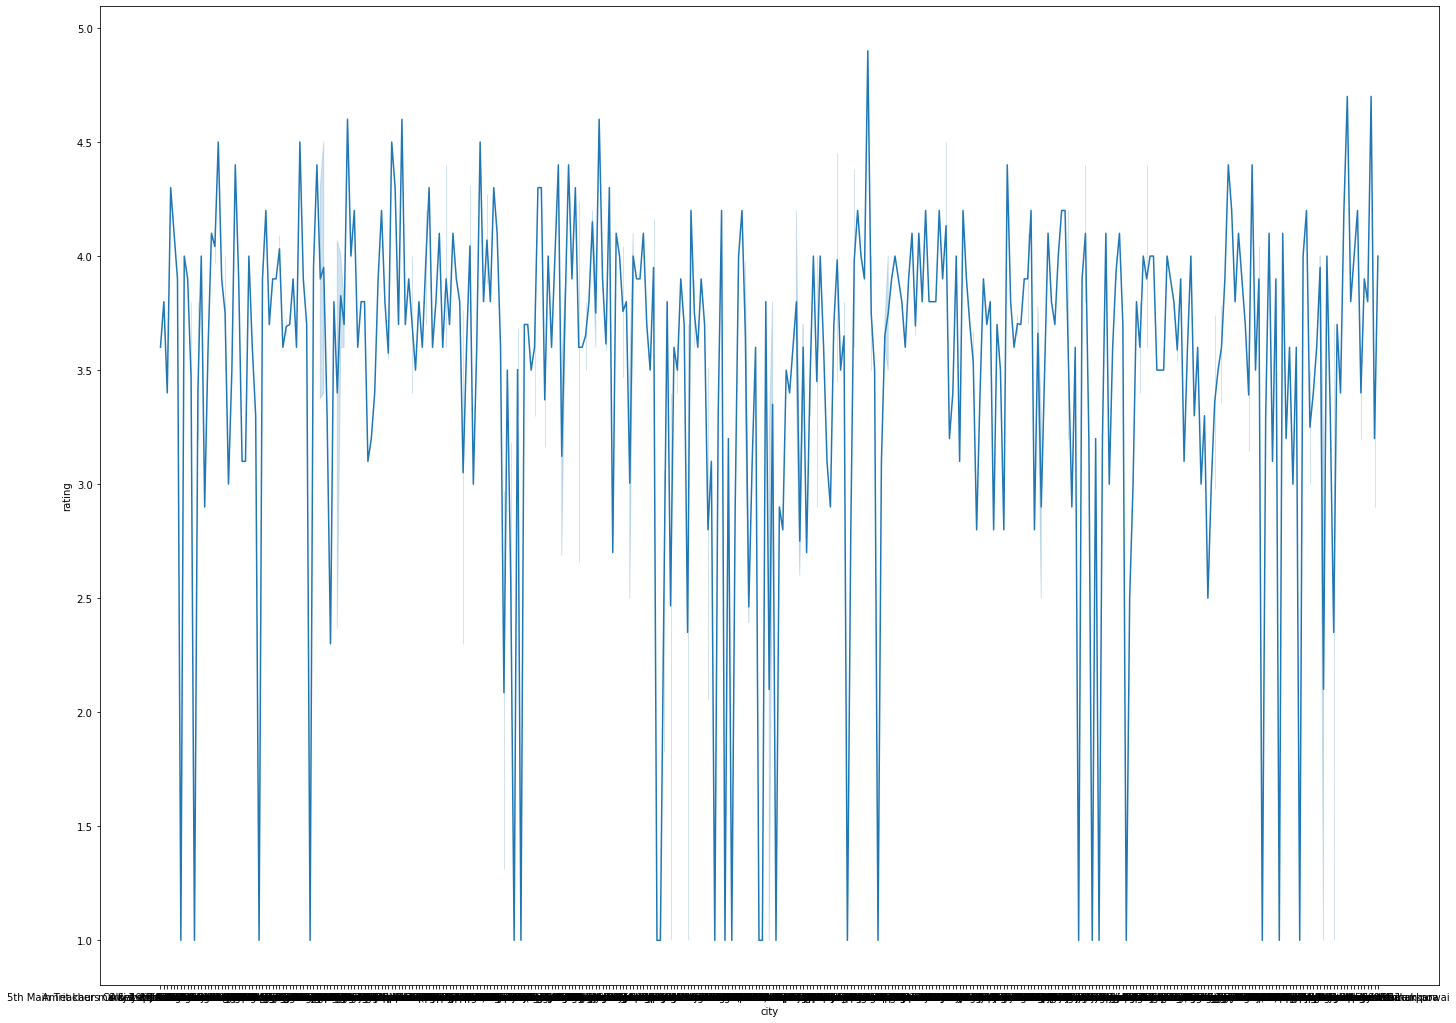

In [23]:
plt.figure(figsize=(24,18))
sns.lineplot(x=train['city'],y=train['rating'],data=train)

Most of the cities having rating from 3.5 to 4.5

In [24]:
#calculating the mean ratings locality wise
mean_locality_rating=train.groupby(['locality'],axis=0).agg({'rating':'mean'})
mean_locality_rating

,rating
locality,
(Main Market) Mayur Vihar Phase 2,4.0
1 st Cross street,3.6
1-7-172/1 Ecil Opposite,3.8
100 Ft Road,3.0
110009,4.4
...,...
rajendra nagar,3.2
seawoods grand central mall,3.9
sector 42,1.0


In [25]:
train.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


In [26]:
#converting categorical into numerical forms using label encoder
list=['title','cuisines','city','locality']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in list:
    train[i]=lb.fit_transform(train[i])


In [27]:
train.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost
0,31,9438,2627,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,3.6,49.0,1200
1,33,13198,289,6pm – 11pm (Mon-Sun),67,1046,4.2,30.0,1500
2,31,10915,2976,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,3.8,221.0,800
3,95,6346,4130,11:30am – 1am (Mon-Sun),222,136,4.1,24.0,800
4,50,15387,1766,11am – 1am (Mon-Sun),222,620,3.8,165.0,300


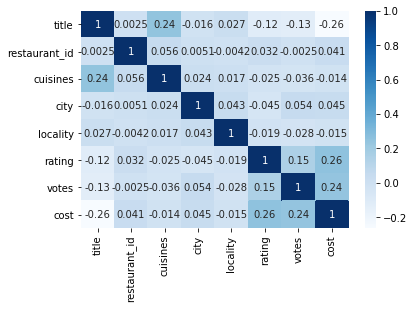

In [28]:
#checking correlation
sns.heatmap(train.corr(),annot=True,cmap='Blues')

As cost is more negatively correlated with locality lets drop it and time also not considering

In [29]:
train.drop(['time','locality'],axis=1,inplace=True)

In [30]:
#checking skewness
train.skew()

title            -0.069803
restaurant_id     0.006947
cuisines         -0.218782
city              0.266332
rating           -1.876192
votes            14.890494
cost              3.978801
dtype: float64

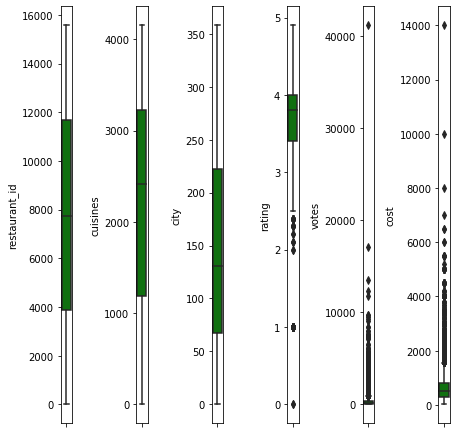

In [31]:
# plotting outliers
collist=train.columns.values
ncol=12
nrows=10
collist
plt.figure(figsize=(ncol, 5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(train[collist[i]],color='green',orient='v')
    plt.tight_layout()
    
           

there are outliers in the train dataset so lets remove it



In [32]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(train))
z

array([[0.86888688, 0.37269233, 0.32540837, ..., 0.08677487, 0.45735622,
        0.86884552],
       [0.80783894, 1.20737672, 1.61638078, ..., 0.74596262, 0.48105544,
        1.34733058],
       [0.86888688, 0.70057234, 0.61526483, ..., 0.30650412, 0.24281588,
        0.23086546],
       ...,
       [0.35207201, 0.74896628, 0.12224961, ..., 0.52623337, 0.23989988,
        1.02834054],
       [0.86888688, 0.36076439, 1.055448  , ..., 0.02308975, 0.47856079,
        0.40711461],
       [0.86888688, 0.29505519, 0.59034881, ..., 0.13295438, 0.32596548,
        0.08812458]])

In [33]:
threshold=3
print(np.where(z>3))

(array([   84,   186,   196,   204,   208,   293,   303,   304,   308,
         337,   344,   354,   379,   421,   422,   431,   469,   502,
         510,   563,   731,   775,   796,   839,   852,   855,   872,
         913,   966,   967,   973,  1034,  1038,  1132,  1133,  1147,
        1151,  1193,  1244,  1288,  1345,  1346,  1395,  1467,  1470,
        1475,  1476,  1522,  1540,  1594,  1617,  1632,  1657,  1681,
        1685,  1759,  1778,  1828,  1850,  1878,  1884,  1916,  1930,
        1931,  2090,  2100,  2111,  2204,  2205,  2207,  2268,  2302,
        2305,  2333,  2339,  2349,  2369,  2459,  2488,  2531,  2604,
        2610,  2622,  2683,  2686,  2689,  2695,  2740,  2886,  2905,
        2940,  2973,  2977,  3002,  3028,  3033,  3036,  3049,  3197,
        3211,  3289,  3309,  3333,  3338,  3396,  3398,  3408,  3492,
        3507,  3526,  3532,  3554,  3578,  3587,  3603,  3688,  3692,
        3704,  3706,  3715,  3728,  3730,  3773,  3841,  3847,  3855,
        3877,  3891

In [34]:
train=train[(z<3).all (axis=1)]
train

,title,restaurant_id,cuisines,city,rating,votes,cost
0,31,9438,2627,320,3.6,49.0,1200
1,33,13198,289,67,4.2,30.0,1500
2,31,10915,2976,67,3.8,221.0,800
3,95,6346,4130,222,4.1,24.0,800
4,50,15387,1766,222,3.8,165.0,300
...,...,...,...,...,...,...,...
12685,95,13228,2934,131,3.8,546.0,500
12686,33,9686,2143,222,4.3,1214.0,1800
12687,71,11133,2088,239,4.0,608.0,1300
12688,31,6134,3506,67,3.5,32.0,400


In [35]:
train.shape

(12267, 7)

In [36]:
#again checking skewness
train.skew()

title           -0.082042
restaurant_id    0.013433
cuisines        -0.216835
city             0.282020
rating          -1.857765
votes            2.531256
cost             1.822339
dtype: float64

In [37]:
#removing skewness as votes and cost is having skewness
train['votes']=np.sqrt(train['votes'])
train['cost']=np.sqrt(train['cost'])

In [38]:
train.skew()

title           -0.082042
restaurant_id    0.013433
cuisines        -0.216835
city             0.282020
rating          -1.857765
votes            1.079451
cost             1.019321
dtype: float64

# Feature selection

In [39]:
x=train.drop('cost',axis=1)
y=train['cost']

In [40]:
x.shape

(12267, 6)

In [41]:
y.shape

(12267,)

# Model Building

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
#feature scaling
#scaling the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [45]:
#checking scoring for LinearRegression model
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.3047657485361155
mean squared error: 44.617788481438424
RSME: 6.6796548175364885


In [46]:
#checking scoring for DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
predd=dtc.predict(x_test)
print("r2 score:",r2_score(y_test,predd))
print("mean squared error:",mean_squared_error(y_test,predd))
print("RSME:",np.sqrt(mean_squared_error(y_test,predd)))

r2 score: 0.36072819507240916
mean squared error: 41.026307484633904
RSME: 6.405178177430656


In [47]:
#checking scoring for Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.6775089127656466
mean squared error: 20.696389867263246
RSME: 4.549328507292395


In [48]:
from sklearn.model_selection import cross_val_score
rfrscores=cross_val_score(rfr,x,y,cv=5)
print(rfrscores)
print(rfrscores.mean(),rfrscores.std())

[0.69506933 0.67763251 0.68475786 0.67794931 0.71310792]
0.6897033847441303 0.013303294306476844


As cross validation score and r2 score is nearly same for random forest so lets find best parameters to improve score

# Hyper parameter tunning

In [49]:
#Hyper parameter tunning
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)
from sklearn.model_selection import RandomizedSearchCV
# randomized search cv
#no. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#no. of feature consider at every split
max_features=['auto','sqrt']
# max. no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#Minimum no. of samples required to split a node
min_sample_split=[2,5,10,15,100]
#minimum no. of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [50]:
# create the random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_sample_split,
             'min_samples_leaf':min_samples_leaf
              }

In [51]:
rf_random=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,scoring='r2',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [52]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  28.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  28.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  26.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  28.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  28.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  45.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 28.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [53]:
predictions=rf_random.predict(x_test)

In [54]:
rf_random.best_score_

0.6901035700824416

In [55]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [56]:
#Lets save this model
from sklearn.externals import joblib
joblib.dump(rf_random,'restaurant_cost.pkl')

['restaurant_cost.pkl']